### Netflix Content Strategy Analysis with Python

-   In the competitive landscape of streaming services, understanding content strategy is paramount to capturing and retaining an audience. This project aims to dissect and analyze Netflix's content strategy using Python, leveraging various data analysis techniques.

-   Through this analysis, we'll explore patterns and trends in Netflix's catalog, including genre distribution, release patterns, and audience engagement metrics. By utilizing Python libraries such as Pandas, Matplotlib, and Seaborn, we'll uncover insights that can inform strategic decisions for content acquisition and production.

### Importing Liberaries & Cleanning The Dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [2]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [3]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Content Type Analysis
    -   6. Seasonal Analysis
    -   7. Correlation Analysis

#### 1. Global Availability Analysis
-  How many titles are available globally?
    

In [4]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show


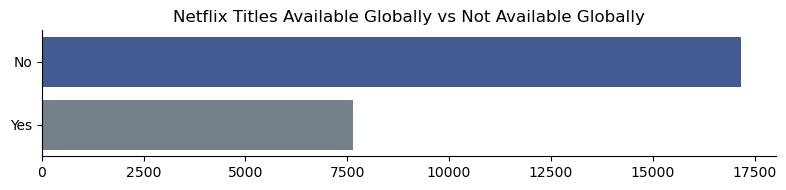

In [5]:
# Count the Titles Available Globally vs The Titles not Available Globally.
df_global_availability = df['Available Globally?'].value_counts().to_frame().reset_index()

plt.figure(figsize=(8, 2))

colors = ['#3557A0', 'slategrey']
sns.barplot(data=df_global_availability,
                x='count',
                y='Available Globally?', 
                palette=colors,
                
                )

plt.title('Netflix Titles Available Globally vs Not Available Globally')
plt.xlabel('')
plt.ylabel('')


sns.despine()
plt.tight_layout()
plt.show()

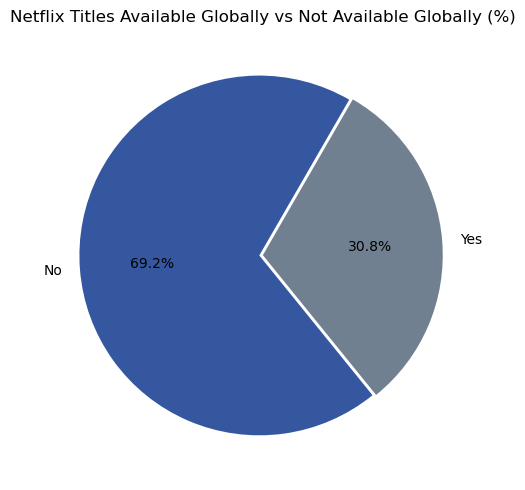

In [6]:
# Let's calculate the percentage of Titles Available Globally vs The Titles not Available Globally.
df_global_availability['percentage'] = ((df_global_availability['count'] / df_global_availability['count'].sum()) * 100).round(2)

plt.figure(figsize=(5, 5))

colors = ['#3557A0', 'slategrey']
plt.pie(df_global_availability['count'], 
        labels=df_global_availability['Available Globally?'], 
        autopct='%1.1f%%', 
        colors=colors,
        startangle=60,
        explode=(0.02, 0),
                
        )


plt.title('Netflix Titles Available Globally vs Not Available Globally (%)')
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  A significant majority, 69.2%, of the analyzed entities are not available globally. This indicates a substantial portion of the content is restricted or limited in its distribution.
    -  The large portion of "No" suggests there might be regional restrictions, licensing issues, or strategic decisions in place that limit global availability. Understanding these reasons can help in developing strategies to overcome these barriers.